## BCIS 5110 Analysis of JD Data

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

#### Assignment 8 include Q1 - Q10.

1. Import necessary packages.

In [1]:
import pandas as pd
import numpy as np

2. Read in the five csv files.

In [2]:
#reading all the data in jd dataset 
order_data = pd.read_csv("C:/Users/st1186/Documents/BCIS 5110/JD Data/JD Data/JD_order_data.csv")
users_data = pd.read_csv("C:/Users/st1186/Documents/BCIS 5110/JD Data/JD Data/JD_user_data.csv")
delivery_data = pd.read_csv("C:/Users/st1186/Documents/BCIS 5110/JD Data/JD Data/JD_delivery_data.csv")
inventory_data = pd.read_csv("C:/Users/st1186/Documents/BCIS 5110/JD Data/JD Data/JD_inventory_data.csv")
network_data = pd.read_csv("C:/Users/st1186/Documents/BCIS 5110/JD Data/JD Data/JD_network_data.csv")

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [3]:
#Sample data for orders
print("order data")
print(order_data.head())

#Sample data for users
print("users data")
print(users_data.head())

#Sample data for delivery
print("delivery data")
print(delivery_data.head())

#Sample data for inventory
print("inventory data")
print(inventory_data.head())

#Sample data for network
print("data")
print(network_data.head())


#Number of observations
print("number of observations for order data:", len(order_data))
print("number of observations for users data:", len(users_data))
print("number of observations for delivery data:", len(delivery_data))
print("number of observations for inventory data:", len(inventory_data))
print("number of observations for network data:", len(network_data))


#number of columns and column names
print("number of columns in order data:", len(order_data.columns))
print("column names in order_data:", order_data.columns)

print("number of columns in users data:", len(users_data.columns))
print("column names in users_data:", users_data.columns)

print("number of columns in delivery data:", len(delivery_data.columns))
print("column names in delivery_data:", delivery_data.columns)

print("number of columns in inventory data:", len(inventory_data.columns))
print("column names in inventory_data:", inventory_data.columns)

print("number of columns in network data:", len(network_data.columns))
print("column names in network_data:", network_data.columns)

order data
     order_ID     user_ID      sku_ID  order_date             order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0   
1  7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
2  f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
3  8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
4  d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.0   
1    

4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [4]:
# checking for missing values in each table

order_missing_values = order_data.isnull().sum()
print("Missing values for order_data",order_missing_values)

users_missing_values = users_data.isnull().sum()
print("Missing values for users_data",users_missing_values)

delivery_missing_values = delivery_data.isnull().sum()
print("Missing values for delivery_data",delivery_missing_values)

inventory_missing_values = inventory_data.isnull().sum()
print("Missing values for inventory_data",inventory_missing_values)

network_missing_values = network_data.isnull().sum()
print("Missing values for network_data",network_missing_values)

Missing values for order_data order_ID                      0
user_ID                       0
sku_ID                        0
order_date                    0
order_time                    0
quantity                      0
type                          0
promise                       0
original_unit_price           0
final_unit_price              0
direct_discount_per_unit      0
quantity_discount_per_unit    0
bundle_discount_per_unit      0
coupon_discount_per_unit      0
gift_item                     0
dc_ori                        0
dc_des                        0
dtype: int64
Missing values for users_data user_ID              0
user_level           0
first_order_month    0
plus                 0
gender               0
age                  0
marital_status       0
education            0
city_level           0
purchase_power       0
dtype: int64
Missing values for delivery_data package_ID          0
order_ID            0
type                0
ship_out_time       0
arr_station_time   

5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [5]:
# checking the promise variable
promise = order_data['promise']
print(promise)

0         -
1         2
2         2
3         2
4         1
         ..
549984    -
549985    3
549986    2
549987    -
549988    4
Name: promise, Length: 549989, dtype: object


6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [6]:
promi_count = order_data['promise'].value_counts()
print(" In promise variable the count of distict values:" )
print(promi_count)

 In promise variable the count of distict values:
-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64


7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [7]:
s_data = order_data[['type','promise']].sort_values(by='type',ascending=False)
#displaying the first 10 and last 10 observations
print("first 10 observations:", s_data.head(10))
print("last 10 observations:", s_data.tail(10))

first 10 observations:         type promise
0          2       -
308329     2       -
308358     2       -
308357     2       -
308356     2       -
308355     2       -
308354     2       -
308353     2       -
308352     2       -
308351     2       -
last 10 observations:         type promise
334636     1       1
334633     1       1
334626     1       1
334632     1       1
334631     1       1
116820     1       2
116821     1       2
116822     1       1
334627     1       1
274994     1       2


8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [4]:
inner_merge_data = order_data.merge(delivery_data,on='order_ID',how='inner')
print("Number of observations using inner_merged_data:", len(inner_merge_data))

Number of observations using inner_merged_data: 326862


9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [9]:
right_merged_data = order_data.merge(delivery_data,on='order_ID',how='right')
print("Number of observations in right_merged_data:", len(right_merged_data))

Number of observations in right_merged_data: 326862


10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [10]:
left_merged_data = order_data.merge(delivery_data, on='order_ID',how='left')
print("Number of observations in  left_merged_data:", len(left_merged_data))

Number of observations in  left_merged_data: 550017


### Assignment 9 starts here. Q11 - Q20.

In this part, we prepare the data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [11]:
# inner_merge_data is  merged DataFrame from the question 8

# unique values in 'type_x' and 'type_y' columns
print("The Unique values in 'type_x' column:", inner_merge_data['type_x'].unique())
print("The Unique values in 'type_y' column:", inner_merge_data['type_y'].unique())

# Replacing values in 'type_x' with  values from 'type_y'
inner_merge_data['type_x'] = inner_merge_data['type_x'].combine_first(inner_merge_data['type_y'])

# Dropped the 'type_y' column
inner_merge_data = inner_merge_data.drop(columns=['type_y'])

# Renamed 'type_x' to 'type' for consistency
inner_merge_data = inner_merge_data.rename(columns={'type_x': 'type'})

# unique values in the cleaned 'type' column
print("\nUnique values in the cleaned 'type' column:", inner_merge_data['type'].unique())

The Unique values in 'type_x' column: [1 2]
The Unique values in 'type_y' column: [1 0]

Unique values in the cleaned 'type' column: [1 2]


Then compare the values of the two variables are the same.

In [12]:
# Assuming 'type' is the common column name in both 'order' and 'delivery' tables and comparing values in both tables

compared_result = order_data['type'].equals(delivery_data['type'])

# Display the result
print("The values of 'type' in order and delivery tables is:", compared_result)

The values of 'type' in order and delivery tables is: False


If they are, please drop one of them.

In [13]:
print("The values of 'type' variables in both order and delivery tables are not same")

The values of 'type' variables in both order and delivery tables are not same


12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [14]:
# Identify orders with a single item
single_orders = inner_merge_data['order_ID'].duplicated(keep=False)
print(single_orders)

0         False
1         False
2         False
3         False
4         False
          ...  
326857    False
326858    False
326859    False
326860    False
326861    False
Name: order_ID, Length: 326862, dtype: bool


Then we filter the data to remove those orders of a single gift item. Save the changes.

In [15]:
# Identify orders where the item is a single gift item
gift_items = inner_merge_data['gift_item'] == 1
print(gift_items)

# Combine the conditions using logical AND 
removed_orders = single_orders & gift_items

# Remove orders that meet the conditions
filter_data = inner_merge_data[~removed_orders]

0         False
1         False
2         False
3         False
4         False
          ...  
326857    False
326858     True
326859    False
326860    False
326861    False
Name: gift_item, Length: 326862, dtype: bool


13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [17]:
#assuming filtered_data has package id
filter_data['packages_count'] = filter_data.groupby('order_ID')['package_ID'].transform('nunique')

#filter the data to keep the orders with single package
filter_data = filter_data[filter_data['packages_count']==1]

#remove the temporary column created
filter_data.drop('packages_count', axis = 1, inplace=True)
print(filter_data)

          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326858  9fa0694b3b  39933e9bc6  767ac490ed  2018-03-31  2018-03-31 19:51:43.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
326860  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
326861  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity  type prom

14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [18]:
#changing all the variables to timestamp datatype
filter_data['order_date'] = pd.to_datetime(filter_data['order_date'])
filter_data['order_time'] = pd.to_datetime(filter_data['order_time'])
filter_data['ship_out_time'] = pd.to_datetime(filter_data['ship_out_time'])
filter_data['arr_station_time'] = pd.to_datetime(filter_data['arr_station_time'])
filter_data['arr_time'] = pd.to_datetime(filter_data['arr_time'])

#get the day of the month from the order_date and save it to a new variable order_day 
filter_data['order_day']=filter_data['order_date'].dt.day
print(filter_data['order_day'].unique())

# Get the hour of the order_time and save it in the new variable order_hour
filter_data['order_hour'] = filter_data['order_time'].dt.hour
print(filter_data['order_hour'].unique())

# Calculating the delivery time by subtracting 'order_time' from 'arr_time'
filter_data['delivery_time'] = filter_data['arr_time'] - filter_data['order_time']
print(filter_data['delivery_time'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[11  9 21 19 22 15  0 14 10 13  5 23 18  7  8 17 16 12 20  2  1  3  6  4]
[ 96560000000000  99994000000000 221410000000000 ... 173845000000000
 194643000000000 412724000000000]


15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [19]:
#transforming the delivery time to hours
filter_data['delivery_time_hours'] = filter_data['delivery_time'].apply(lambda x: x.total_seconds() /3600)
print(filter_data['delivery_time_hours'].unique())

[ 26.82222222  27.77611111  61.50277778 ...  48.29027778  54.0675
 114.64555556]


16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [20]:
# Counting unique packages by using group by method between origin and destination centres
number_packages = filter_data.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique().reset_index()
# renaming the count
number_packages = number_packages.rename(columns={'package_ID': 'total_packages'})

highest_traffic = number_packages.sort_values(by='total_packages', ascending = False).head()
print(highest_traffic)

     dc_ori  dc_des  total_packages
31        5       5           31618
6         2       2           23429
71        9       9           23065
23        4       4           20440
120      24      24           12638


17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [21]:
#filtering the order_data where gift items = 1
gifts = order_data[order_data['gift_item'] == 1]

#describing original unit price and final unit price
print(gifts[['original_unit_price','final_unit_price']].describe())

#check for 0 price orders
zero_orders = gifts[(gifts['original_unit_price']==0) | (gifts['final_unit_price']==0)]

#showing 0 price orders
print("print thr orders with 0 price :",zero_orders)

       original_unit_price  final_unit_price
count         94606.000000      94606.000000
mean              0.004334         -0.215242
std               0.544303          1.109574
min               0.000000        -32.000000
25%               0.000000          0.000000
50%               0.000000          0.000000
75%               0.000000          0.000000
max              69.000000          0.000000
print thr orders with 0 price :           order_ID     user_ID      sku_ID  order_date             order_time  \
6       89286e5fd9  79154d0001  6717b7c979  2018-03-01  2018-03-01 22:18:41.0   
10      9c65b6264b  2021a86702  d3e31fdd6e  2018-03-01  2018-03-01 00:12:07.0   
23      8b71aa6716  9bb8b4c04f  a0e49f9966  2018-03-01  2018-03-01 22:08:44.0   
25      67b8f778f6  53dc20e68d  a0e49f9966  2018-03-01  2018-03-01 23:17:02.0   
26      67b8f778f6  53dc20e68d  c98d32ff09  2018-03-01  2018-03-01 23:17:02.0   
...            ...         ...         ...         ...                    ...

18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [22]:
#filter out product on  '2018-3-15'.
filter_order = order_data[(order_data['sku_ID']=='a0e49f9966')&(order_data['order_date']=='2018-3-15')]

#calculate sales
Totalsales = (filter_order['quantity']*filter_order['final_unit_price']).sum()

print("The Total sales for sku_id a0e49f9966 on 2018-3-15 is:", Totalsales)

The Total sales for sku_id a0e49f9966 on 2018-3-15 is: 0.0


19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [23]:
pivottable = pd.pivot_table(users_data, values = 'user_ID', index=['user_level','education'], aggfunc='count')
print(pivottable)

                      user_ID
user_level education         
-1         -1            2294
            3               9
 0         -1             145
            2               7
            3               8
            4               1
 1         -1           66391
            1            3001
            2           24182
            3           35486
            4             369
 2         -1           28310
            1            3270
            2           32953
            3           75907
            4            1419
 3         -1            8201
            1            1260
            2           13418
            3           68944
            4            4979
 4         -1            4023
            1             629
            2            3606
            3           37548
            4           39922
 10        -1            1005
            2               2
            3               6
            4               3


20. Answer one of your descriptive questions using groupby or pivot table.

In [24]:
# Question :what are the userids which has a userlevel of 10 in JD_user_datasheet

# Group by UserIDs and filter for user level 10
userlevel_10 = users_data[users_data['user_level'] == 10].groupby('user_ID').size().reset_index(name='count')

# Display UserIDs with user level 10
users_ids = userlevel_10['user_ID'].tolist()
print("The number of UserIDs with user level 10:", len(users_ids))
print ("The Userids are:", users_ids)

The number of UserIDs with user level 10: 1016
The Userids are: ['00837cf479', '00a443ecc3', '00a70a9191', '00f6823780', '01521403b4', '016b2b3f13', '01cae542e7', '01d8d78868', '01f9df75a0', '02265db32c', '028f628fbc', '02b520de36', '037077d9ca', '039f560ae3', '03e1dce9e6', '0419715d3d', '042167a1ab', '045f013304', '049e8b26fc', '04fb500954', '0527441a16', '0624db7e1c', '063e0f3c90', '065c6c6764', '06867cd51d', '06c97d3b6a', '071643a5e0', '0720b06636', '072b6a577f', '0738ae884e', '07919e0ae0', '0821997f12', '0839e062a0', '087b707851', '089b331eb8', '08cb12292a', '08f91d2365', '092a19579b', '0976c5fc89', '0977616af3', '09e6062b86', '0a30339749', '0a33fb959c', '0a50a9389e', '0a83f756da', '0a85816c03', '0aad1a34de', '0ae7c26632', '0afb90bee7', '0b4d56b138', '0b7f8b4046', '0b80b2093f', '0ba59218bf', '0ba9bb8f03', '0bc847c6c5', '0c24f7b6af', '0c2e0e61d2', '0c6d9a169e', '0c6fbd41b4', '0d19921f4d', '0d53819e16', '0d93f7621e', '0daa203730', '0e02e9c582', '0e45124983', '0e5e37da04', '0e648cf855

### Assignment 10 starts here. Q21-Q30.
We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [26]:
users_data['user_level'] = users_data['user_level'].astype('string')
users_data['education'] = users_data['education'].astype('string')
users_data['city_level'] = users_data['city_level'].astype('string')
users_data['purchase_power'] = users_data['purchase_power'].astype('string')

In [27]:
print("The information of users_data table after changing the datatypes is:")
print(users_data.info())

The information of users_data table after changing the datatypes is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  string
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  string
 8   city_level         457298 non-null  string
 9   purchase_power     457298 non-null  string
dtypes: int64(1), object(5), string(4)
memory usage: 34.9+ MB
None


22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [29]:
users_data['user_level'] = users_data['user_level'].replace({'-1': 'New', '10': 'Bus'})

print("The Updated column for 'user_level' is:")
print(users_data['user_level'])

The Updated column for 'user_level' is:
0         1
1         1
2         3
3         3
4         3
         ..
457293    1
457294    4
457295    3
457296    1
457297    1
Name: user_level, Length: 457298, dtype: string


2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [30]:
users_data['education'] = users_data['education'].replace({'-1': 'U'})
users_data['city_level'] = users_data['city_level'].replace({'-1': 'U'})
users_data['purchase_power'] = users_data['purchase_power'].replace({'-1': 'U'})

print("The updated 'education' column is:")
print(users_data['education'])

print("\nThe updated 'city_level' column is:")
print(users_data['city_level'])

print("\nThe updated 'purchase_power' column is:")
print(users_data['purchase_power'])

The updated 'education' column is:
0         3
1         U
2         3
3         3
4         U
         ..
457293    U
457294    3
457295    2
457296    U
457297    U
Name: education, Length: 457298, dtype: string

The updated 'city_level' column is:
0         4
1         U
2         2
3         2
4         U
         ..
457293    U
457294    1
457295    4
457296    U
457297    3
Name: city_level, Length: 457298, dtype: string

The updated 'purchase_power' column is:
0         3
1         U
2         3
3         2
4         U
         ..
457293    U
457294    2
457295    2
457296    U
457297    3
Name: purchase_power, Length: 457298, dtype: string


23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

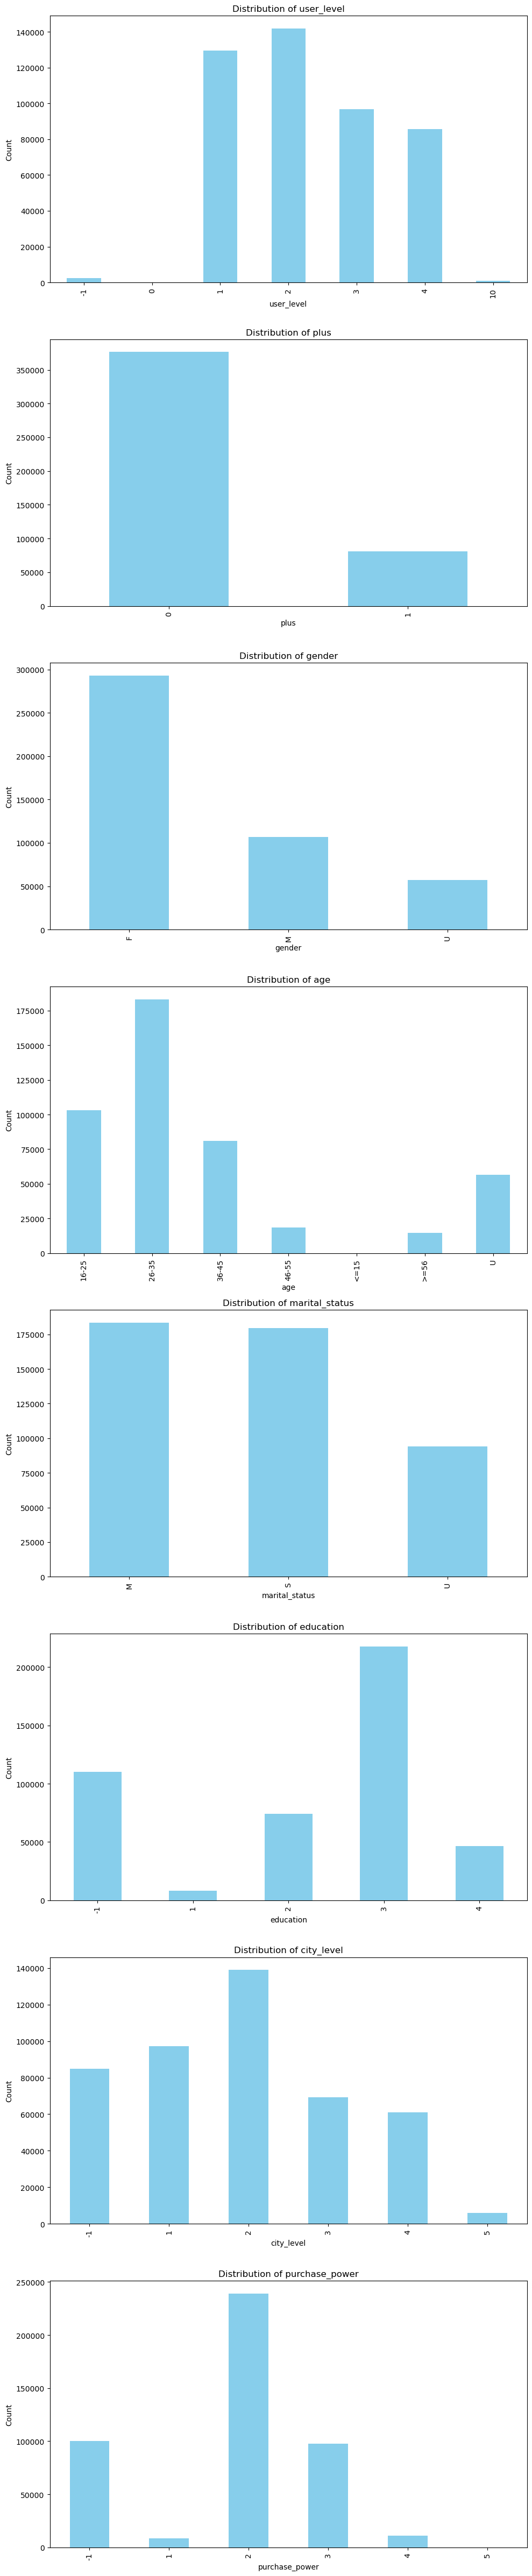

In [6]:
import matplotlib.pyplot as plt

#specifying the categorical variables 
categorical_variable = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']

fig, axes = plt.subplots(nrows=len(categorical_variable), ncols=1, figsize=(10, 6 * len(categorical_variable)))

for i, variable in enumerate(categorical_variable):
    ax = axes[i]
    users_data[variable].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

25. Next we move to the table that resulted from Q10-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

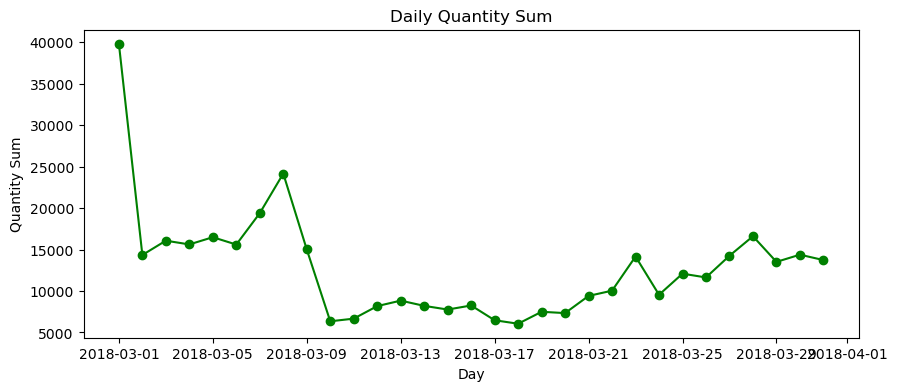


The day with the most quantity sold: 2018-03-01 00:00:00
Quantity sold on that day: 39822


In [9]:
inner_merge_data['order_date'] = pd.to_datetime(inner_merge_data['order_date'])

daily_quantity = inner_merge_data.groupby('order_date')['quantity'].sum()

plt.figure(figsize=(10, 4))
plt.plot(daily_quantity.index, daily_quantity.values, marker='o', linestyle='-', color='g')
plt.title('Daily Quantity Sum')
plt.xlabel('Day')
plt.ylabel('Quantity Sum')
plt.show()

max_quantity_day = daily_quantity.idxmax()
max_quantity_value = daily_quantity.max()

print(f"\nThe day with the most quantity sold: {max_quantity_day}")
print(f"Quantity sold on that day: {max_quantity_value}")

26. Repeat Q25 for variable 'hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

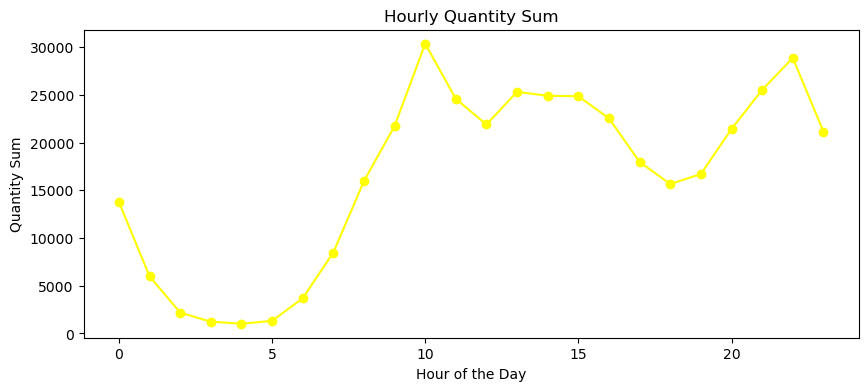


The peak time for orders: 10:00 - 11:00
Quantity ordered during the peak time: 30379


In [46]:
inner_merge_data['order_time'] = pd.to_datetime(inner_merge_data['order_time'])

hourly_quantity = inner_merge_data.groupby(inner_merge_data['order_time'].dt.hour)['quantity'].sum()

plt.figure(figsize=(10, 4))
plt.plot(hourly_quantity.index, hourly_quantity.values, marker='o', linestyle='-', color='Yellow')
plt.title('Hourly Quantity Sum')
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity Sum')
plt.show()

peak_hours = int(hourly_quantity.idxmax())
peak_quantity = hourly_quantity.max()

print(f"\nThe peak time for orders: {peak_hours}:00 - {peak_hours + 1}:00")
print(f"Quantity ordered during the peak time: {peak_quantity}")

27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [50]:
original_unit_price_statistics = order_data['original_unit_price'].describe()

print("Statistics for 'original_unit_price' variable:")
print(original_unit_price_statistics)

min_price = original_unit_price_statistics['min']
max_price = original_unit_price_statistics['max']
median_price = order_data['original_unit_price'].median()

print(f"\nMinimum 'original_unit_price': {min_price}")
print(f"Maximum 'original_unit_price': {max_price}")
print(f"Median 'original_unit_price': {median_price}")

Statistics for 'original_unit_price' variable:
count    549989.000000
mean        102.813542
std          95.035563
min           0.000000
25%          59.000000
50%          79.000000
75%         139.000000
max       12158.000000
Name: original_unit_price, dtype: float64

Minimum 'original_unit_price': 0.0
Maximum 'original_unit_price': 12158.0
Median 'original_unit_price': 79.0


2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [51]:
percent_greaterthan_350 = (order_data['original_unit_price'] > 350).mean() * 100
print(f"Percentage of observations with 'original_unit_price' > 350: {percent_greaterthan_350:.2f}%")

filter_order_data = order_data[order_data['original_unit_price'] <= 350]

print("\nInformation about the filtered dataset:")
print(filter_order_data.info())

Percentage of observations with 'original_unit_price' > 350: 0.75%

Information about the filtered dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 545878 entries, 0 to 549988
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    545878 non-null  object 
 1   user_ID                     545878 non-null  object 
 2   sku_ID                      545878 non-null  object 
 3   order_date                  545878 non-null  object 
 4   order_time                  545878 non-null  object 
 5   quantity                    545878 non-null  int64  
 6   type                        545878 non-null  int64  
 7   promise                     545878 non-null  object 
 8   original_unit_price         545878 non-null  float64
 9   final_unit_price            545878 non-null  float64
 10  direct_discount_per_unit    545878 non-null  float64
 11  quantity_discount_per_

3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

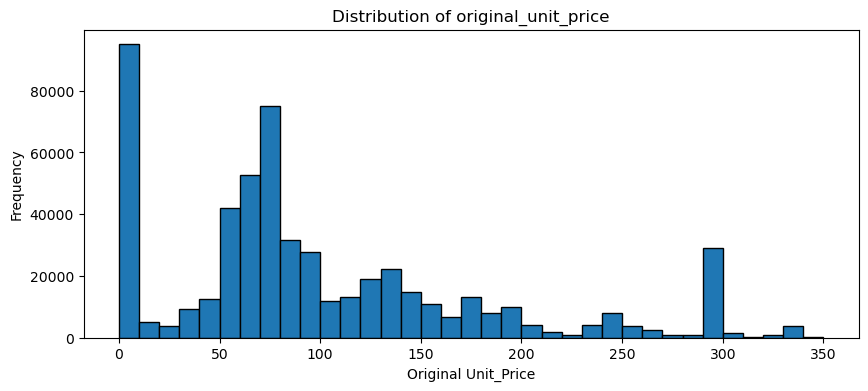


Most orders with the Price range: (-0.001, 10.0]


In [57]:
bins = range(0, 360, 10)

plt.figure(figsize=(10, 4))
plt.hist(filter_order_data['original_unit_price'], bins=bins, edgecolor='black')
plt.title('Distribution of original_unit_price')
plt.xlabel('Original Unit_Price')
plt.ylabel('Frequency')
plt.show()

mostorders_bin = filter_order_data['original_unit_price'].value_counts(bins=bins).idxmax()
print(f"\nMost orders with the Price range: {mostorders_bin}")

28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

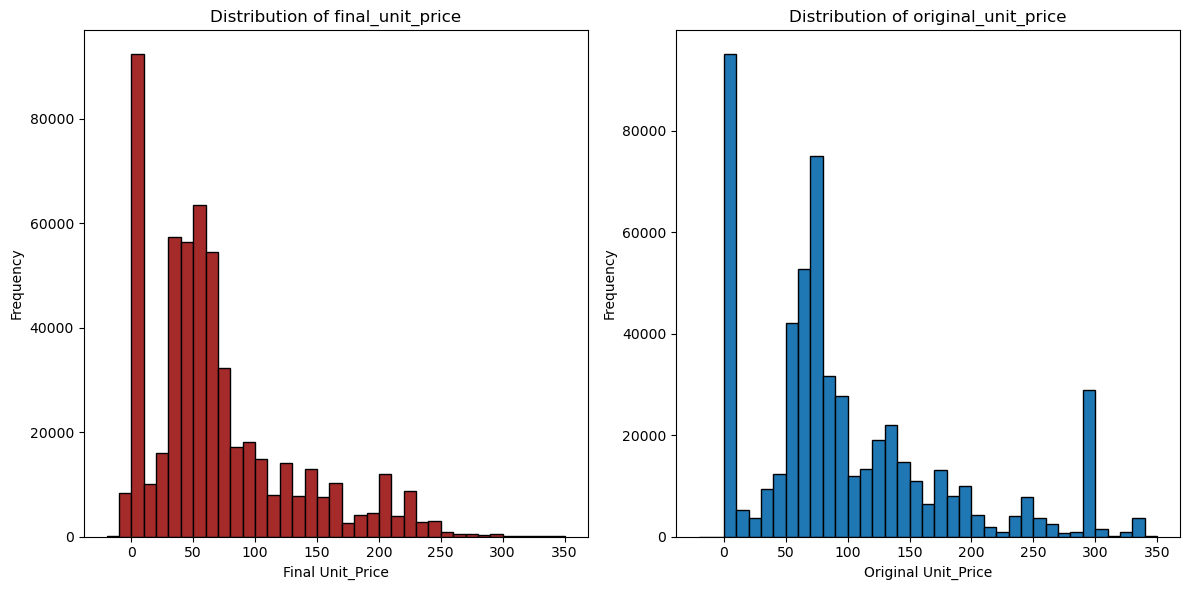

In [65]:
bins = range(-20, 360, 10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.hist(filter_order_data['original_unit_price'], bins=bins, edgecolor='black')
plt.title('Distribution of original_unit_price')
plt.xlabel('Original Unit_Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1)
plt.hist(filter_order_data['final_unit_price'], bins=bins, edgecolor='black', color='brown')
plt.title('Distribution of final_unit_price')
plt.xlabel('Final Unit_Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

C:\Users\st1186\AppData\Local\Temp\ipykernel_22476\3755241594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_order_data['sales'] = filter_order_data['quantity'] * filter_order_data['final_unit_price']
C:\Users\st1186\AppData\Local\Temp\ipykernel_22476\3755241594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_order_data['order_date'] = pd.to_datetime(filter_order_data['order_date'])


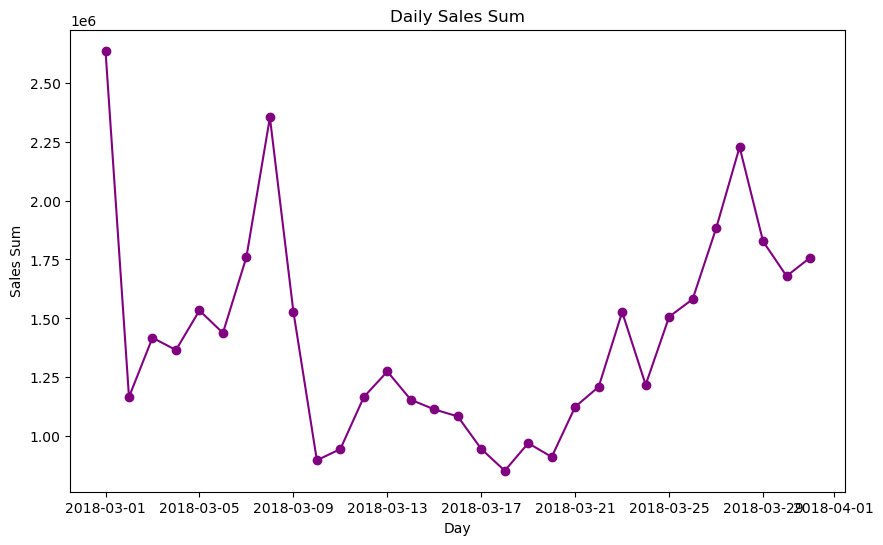

In [87]:
# creating new variable
filter_order_data['sales'] = filter_order_data['quantity'] * filter_order_data['final_unit_price']

#converting 'order_date' into datetime type
filter_order_data['order_date'] = pd.to_datetime(filter_order_data['order_date'])

#Group by 'order_day' and sum the 'sales'
daily_sales_sum = filter_order_data.groupby('order_date')['sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_sales_sum.index, daily_sales_sum.values, marker='o', linestyle='-', color='purple')
plt.title('Daily Sales Sum')
plt.xlabel('Day')
plt.ylabel('Sales Sum')
plt.show()

30. Try to answer one descriptive question you asked in your project initial report.

In [4]:


# Question :what are the userids which has a userlevel of 10 in JD_user_datasheet

# Assuming 'Actual_user_id_column_name' is the correct column name for user ID
user_level_10 = users_data[users_data['user_level'] == 10]

# Display User ids with user level 10
user_ids_user_level_10 = user_level_10['user_ID'].tolist()
print("User ids with user level 10:", len(user_ids_user_level_10))


User ids with user level 10: 1016
